# Seminar 14

# Newton method

## Reminder

1. Descent methods
2. Descent directions
3. Gradient descent
4. Step size selection rules
5. Convergence theorem
6. Experiments

## Drawbacks of gradient descent

- Linear convergence
- Dependence on the condition number

Can we fix both of them?

## Idea of Newton method
Consider the problem

$$
\min\limits_{x\ \in \mathbb{R}^n} f(x).
$$

- Gradient descent $\equiv$ **linear** approximation of $f$
- Newton method $\equiv$ **quadratic** approximation of $f$:

$$
f(x + h) \approx f(x) + \langle f'(x), h \rangle + \frac{1}{2}h^{\top}f''(x)h \to \min_{h}
$$

From the necessary condition follows:

$$
f'(x) + f''(x) h = 0, \qquad h^* = -(f''(x))^{-1} f'(x)
$$

### Is the found direction descent?

Check sign of the scalar product $\langle f'(x), h^* \rangle$.

$$
\langle f'(x), h^* \rangle = -(f')^{\top}(x) (f''(x))^{-1} f'(x) < 0 \Leftarrow f''(x) \succ 0
$$

**Q:** what if for some $k^*$ hessian becomes indefinite?

## Newton method

- Classical Newton method: $\alpha_k \equiv 1$
- Damped Newton method: $\alpha_k$ is selected in every iteration according to given rule

```python
def NewtonMethod(f, x0, epsilon, **kwargs):
    
    x = x0
    
    while True:
        
        h = ComputeNewtonStep(x, f, **kwargs)
        
        if StopCriterion(x, f, h, **kwargs) < epsilon:
            
            break
            
        alpha = SelectStepSize(x, h, f, **kwargs)
            
        x = x + alpha * h
            
    return x

```

## Convergence theorem (Y. E. Nesterov Introduction to convex optimization, $\S$ 1.2)

**Theorem.** Assue that $f(x)$ is
- twice differentiable and its hessian is Lipschitz with constant $M$
- there exists local minimizer where the hessian is positive definite 

$$
f''(x^*) \succeq l\mathbf{I}, \; l > 0
$$

- starting point $x_0$ is sufficiently close to the minimizer

$$
\|x_0 - x^*\|_2 \leq \frac{2l}{3M}
$$

Then Newton method convrges **quadratically**:

$$
\|x_{k+1} - x^* \|_2 \leq \dfrac{M\|x_k - x^*\|^2_2}{2 (l - M\|x_k - x^*\|_2)}
$$

### Example

Use Newton method to find root of the following function

$$
\varphi(t) = \dfrac{t}{\sqrt{1+t^2}}
$$

and find from what interval of $t_0$ it converges

## Affine invariance

Consider function $f(x)$ и non-singular transformation with matrix $A$. 

Check how Newton method direction will be changed after transformation $A$.

Let $x = Ay$ and $g(y) = f(Ay)$. Then

$$
g(y + u) \approx g(y) + \langle g'(y), u \rangle + \frac{1}{2} u^{\top} g''(y) u \to \min_{u}
$$

and

$$
u^* = -(g''(y))^{-1} g'(y) \qquad y_{k+1} = y_k - (g''(y_k))^{-1} g'(y_k)
$$

or

\begin{align*}
y_{k+1} & = y_k - (A^{\top}f''(Ay_k)A)^{-1} A^{\top}f'(Ay_k)\\
& = y_k - A^{-1}(f''(Ay_k))^{-1}f'(Ay_k)
\end{align*}

Thus,

$$
Ay_{k+1} = Ay_k - (f''(Ay_k))^{-1}f'(Ay_k) \quad x_{k+1} = x_k - (f''(x_k))^{-1}f'(x_k)
$$

Therefore, direction given by Newton method is transformed in the similar way as coordinates!

### Newton method with hessian modification

- How to deal with possible not positive definiteness of the hessian in some iteration?
- If $f''(x)$ is not positive definite, use positive definite matrix $f''(x) + \Delta E$
- Matrix $\Delta E$ can be chosen in different ways using the following problem
$$
\Delta E = \arg\min \|\Delta E\|, \quad \text{s.t. } f''(x) + \Delta E \succ 0
$$
    - $\|\cdot\|_2$: $\Delta E = \tau I$, where $\tau = \max(0, \delta - \lambda_{\min}(f''(x)))$, where $\delta > 0$ - given estimate of the minimal eigenvalue of the matrix $f''(x) + \Delta E$
    - What is $\Delta E$ if one uses $\|\cdot\|_F$?
    
- As far as $\lambda(f''(x))$ is usually unavailable in every iteration, it is possible to modify Cholesky factorization algorithm such that it gives factor for the matrix $f''(x) + \Delta E$ instead of the initial matrix  $f''(x)$

## Computational complexity and experiments

Bottlenecks in Newton method:

- composing and storing of hessian
- solving of linear system

$$
f''(x_k)h = -f'(x_k)
$$

### Test problem 

Remember problem of finding analytical center of the inequality sustem $Ax \leq 1$ subject to $|x_i| \leq 1$

$$
f(x) = - \sum_{i=1}^m \log(1 - a_i^{\top}x) - \sum\limits_{i = 1}^n \log (1 - x^2_i) \to \min_x
$$

$$
f'(x) - ? \quad f''(x) - ?
$$ 

In [1]:
import numpy as np

USE_COLAB = False
if USE_COLAB:
    !pip install git+https://github.com/amkatrutsa/liboptpy
        
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss

n = 1000
m = 200
x0 = np.zeros((n,))
A = np.random.rand(n, m) * 10

#### Exact solution with CVXPy

In [2]:
import cvxpy as cvx
x = cvx.Variable((n, 1))

obj = cvx.Minimize(cvx.sum(-cvx.log(1 - A.T * x)) - 
                   cvx.sum(cvx.log(1 - cvx.square(x))))
prob = cvx.Problem(obj)
prob.solve(solver="SCS", verbose=True, max_iters=1000)
print("Optimal value =", prob.value)

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 205200, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 1000, normalize = 1, scale = 1.00
Variables n = 3200, constraints m = 6600
Cones:	soc vars: 3000, soc blks: 1000
	exp vars: 3600, dual exp vars: 0
Setup time: 1.23e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf      -inf       inf  3.26e-02 
   100| 1.62e+01  3.27e+00  9.82e-03 -8.79e+03 -8.62e+03  1.82e-13  1.30e+00 
   200| 1.44e+00  9.74e-01  1.70e-03 -1.94e+03 -1.93e+03  3.25e-13  2.60e+00 
   300| 4

#### Auxilliary functions

In [3]:
f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), axis=1) + 2 * x / (1 - np.power(x, 2))
hess_f = lambda x: (A.dot(np.diagflat(1 / (1 - A.T.dot(x))**2))).dot(A.T) + np.diagflat(2 * (1 + x**2) / (1 - x**2)**2)

#### Implementation of Newton method

In [4]:
def Newton(f, gradf, hessf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        gradient = gradf(x)
        hess = hessf(x)
        h = np.linalg.solve(hess, -gradient)
        alpha = line_search(x, h, **opt_arg)
        x = x + alpha * h
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    return res

#### Comparison with gradient descent

In [5]:
newton = methods.so.NewtonMethod(f, grad_f, hess_f, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.))
x_newton = newton.solve(x0, tol=1e-6, max_iter=50, disp=True)

gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.))
x_gd = gd.solve(x0, tol=1e-6, max_iter=50, disp=True)

Required tolerance achieved!
Convergence in 14 iterations
Function value = -1368.6652957529736
Norm of gradient = 7.596291750182202e-10
Required tolerance achieved!
Convergence in 47 iterations
Function value = -1368.6652957529739
Norm of gradient = 3.0014120117562214e-09


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


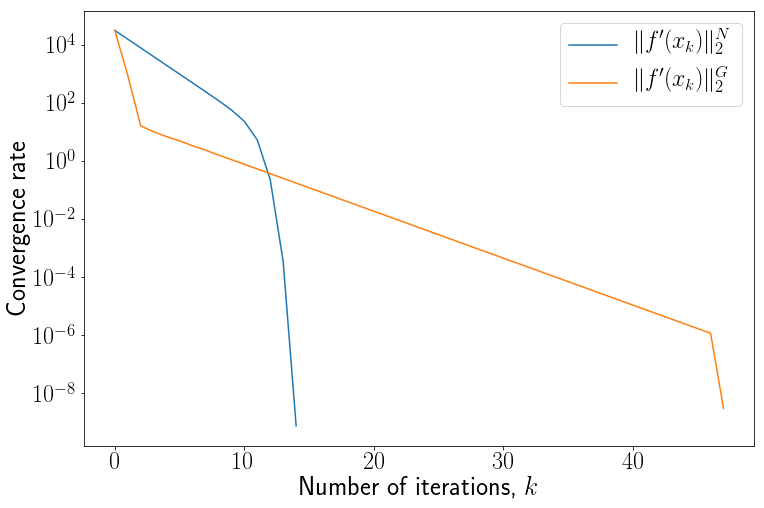

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

if not USE_COLAB:
    plt.rc("text", usetex=True)
    
plt.figure(figsize=(12, 8))
# Newton
plt.semilogy([np.linalg.norm(grad_f(x)) for x in newton.get_convergence()], label="$\| f'(x_k) \|^{N}_2$")
# Gradient
plt.semilogy([np.linalg.norm(grad_f(x)) for x in gd.get_convergence()], label="$\| f'(x_k) \|^{G}_2$")
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel(r"Convergence rate", fontsize=26)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend(loc="best", fontsize=24)

#### Comparison of running time

In [7]:
%timeit newton.solve(x0, tol=1e-6, max_iter=50)
%timeit gd.solve(x0, tol=1e-6, max_iter=50)

612 ms ± 138 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


256 ms ± 41.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- Newton method gives very accurate solution in long time
- Gradient descent gives not very accurate solution but much faster
- Sometimes inaccurate solution is not critical issue, therefore gradient descent can be the method of choice

## Pro & Contra

Pro

- quadratic convergence near the solution
- high accurate solution
- affine invariance

Contra

- it is necessary to store hessian in every iteration: $O(n^2)$ memory
- it is necessary to solve linear systems: $O(n^3)$ flops in general case
- hessian can be singular or ill-conditioned

## Summary of comparison with GD (B.T. Polyak Introduction to optimization, Ch. 3, $\S$ 1 )

Method | Convergence speed | Complexity | Affine invariance | Restrictions to $f(x)$
:---: | :---: | :---: | :---: | :---
GD | Global linear | $O(n) + $ step size search | No | Differentiable, Lipschits gradient
Newton method | Local quadratic | $O(n^3) + $ step size search | Yes | Twice differentiable; Lipschitz and positive definite hessian 

## What's next?

- **Complexity:** how to deal with solving linear systems and storing of hessian?
- **Convergence:** how to combine local quadratic and global linear convegence? It's desirable to get global quadratic convergence!
- Restrictions to $f(x)$ should be minimized
- Quasi-Newton methods often solve these issues

## Recap

1. Newton method
2. Convergence theorem
4. Comparison with gradient descent
5. Experiments